In [98]:
import glob
import pandas as pd
import numpy as np
import os

In [99]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import re 

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
import joblib

In [100]:
all_file= glob.glob("../songData/*.xlsx")
len(all_file)
all_file

['../songData/songType5.xlsx',
 '../songData/songType11.xlsx',
 '../songData/songType12.xlsx',
 '../songData/songType14.xlsx',
 '../songData/songType18.xlsx',
 '../songData/songType15.xlsx',
 '../songData/songType9.xlsx',
 '../songData/songType2.xlsx',
 '../songData/songType13.xlsx',
 '../songData/songType16.xlsx',
 '../songData/songType8.xlsx',
 '../songData/songType6.xlsx',
 '../songData/songType19.xlsx',
 '../songData/songType7.xlsx',
 '../songData/songType1.xlsx',
 '../songData/songType4.xlsx',
 '../songData/songType0.xlsx',
 '../songData/songType17.xlsx',
 '../songData/songType20.xlsx',
 '../songData/songType3.xlsx',
 '../songData/songType10.xlsx']

In [101]:
names = []
count = []
clusters = []
data = []

for each in all_file:
    temp = pd.read_excel(each)
    count.append(len(temp))
    names.append(each.split('/')[2][:-5])
    clusters.append(temp['songType'].iloc[0])
    data.append(temp)
names

['songType5',
 'songType11',
 'songType12',
 'songType14',
 'songType18',
 'songType15',
 'songType9',
 'songType2',
 'songType13',
 'songType16',
 'songType8',
 'songType6',
 'songType19',
 'songType7',
 'songType1',
 'songType4',
 'songType0',
 'songType17',
 'songType20',
 'songType3',
 'songType10']

In [102]:
data = pd.concat(data)
data = data.sample(frac = 1)

In [103]:
stop_words = [ 'হাই', 'ফ্রিকুয়েন্সি', 'কিন্তু', 'অপ্রয়োজনীয়', 'শব্দ' ]

In [104]:
data['lyrics']= data['lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [105]:
X_train, X_test, y_train, y_test =  train_test_split(data['lyrics'], data['songType'], test_size=0.33, random_state=42 )

In [127]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics

total_data_count = len(data)
per_class_counts = []
unique_classes = np.unique(data['songType'].values)
class_count_mean = np.mean(count)

###########################3
############### classifier setup ################

from sklearn.neighbors import KNeighborsClassifier
text_clf_svm = Pipeline([
    
    ('vect', CountVectorizer(stop_words = stop_words,
                            analyzer="word", 
                            lowercase=False,
                            token_pattern="[\S]*",
                            tokenizer=None,
                            ngram_range=(1, 3),
                            preprocessor=None)),                 
    ('tfidf', TfidfTransformer()),
    ('clf-svm', KNeighborsClassifier(n_neighbors = 5,algorithm = 'brute')),
                                                                        
])
classifier = text_clf_svm.fit(list(X_train), list(y_train))


cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
score = cross_val_score(text_clf_svm, list(X_train), list(y_train), cv=cv)

print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


predicted = classifier.predict(X_test)

/home/tuktuki/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [''] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/home/tuktuki/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [''] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/home/tuktuki/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [''] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/home/tuktuki/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words 

Cross Accuracy: 0.19 (+/- 0.08)


In [108]:
joblib.dump(classifier, '../Model/sample_model.pickle')

['../Model/sample_model.pickle']

In [109]:
print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print(metrics.classification_report(y_test, predicted))

Cross Accuracy: 0.19 (+/- 0.08)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.29      0.14      0.19       336
           2       0.00      0.00      0.00         2
           3       0.32      0.08      0.13       256
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        17
           6       0.17      0.28      0.21        18
           7       1.00      0.01      0.03        67
           8       0.00      0.00      0.00         5
           9       0.50      0.07      0.12        14
          10       0.50      0.05      0.09        20
          11       0.00      0.00      0.00        21
          12       0.04      0.11      0.06        46
          13       0.18      0.67      0.28       219
          14       0.00      0.00      0.00        19
          16       0.00      0.00      0.00         2
          17       0.73      0.07      0.12      

/home/tuktuki/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
import pandas as pd
confusion_matrix = list(metrics.confusion_matrix(y_test, predicted))

<AxesSubplot:>

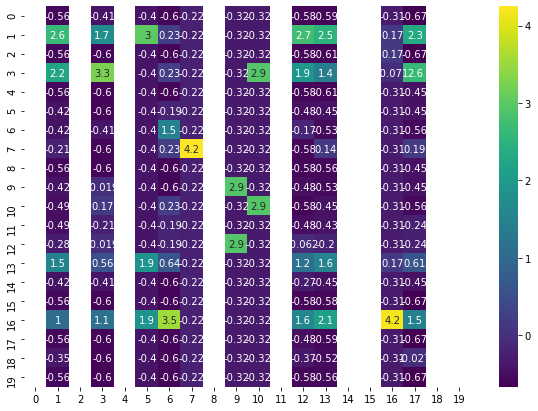

In [124]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix
df_cm = pd.DataFrame(array)
df_norm_col=(df_cm-df_cm.mean())/df_cm.std()
#df_norm_col=df_cm-df_cm.mean()
plt.figure(figsize = (10,7))
sn.heatmap(df_norm_col, annot=True,cmap='viridis')